In [12]:
from Bio import Phylo
import io

with open("mainDataFile.txt",'rb') as f:
    #跳过不必要行
    for i in range(4):
        print(f.readline())

    #第一列病毒名获取
    data = f.readline()

data = str(data).replace('(','').replace(')','').split(',')
data = data[2:]
data[:10]

b'#SARS-CoV-2 format eGPS v3.0\n'
b'Updated on 1136:5075464\n'
b'Genome size 29903 | considered from 100 to 29800\n'
b'Mutation rate per site per year: genomeWide 1.2878E-03 orf1a 7.4318E-04 orf1b 1.9115E-04 S 5.2900E-03 ORF3a 8.7096E-04 E 2.5549E-03 M 2.8236E-03 ORF6 9.3362E-03 ORF7a 1.2878E-03 ORF7b 3.5714E-03 ORF8 1.2878E-03 N 1.2313E-03 ORF10 3.3395E-05 noncoding 2.1589E-03\n'


['3:G20670A|G20679A:29:M:32:86:650',
 '13012:C2915A|A14280G|G15327T|G17686T|G25217T:53::33:66:132',
 '576:T1405C|G9802T|A19945G|C25267T|C27615G:64:M:0:86:1490',
 '22141:C7979T|T11301C|G12243T|T15794C|A16847T|TAAAA17201-|G24858A|C25466T|G27261T|A27344T|A27345T|A27354G:123:F:52:1:385',
 '12::45:M:63:86:2643',
 '31:G709A|T6846C|A11707G|A19959C|A22622G|G22652T|T25645C|C28716T:46:M:63:86:2643T23569C:15:40:1',
 '13501:G1820A|G8013A|C18267T|TTT21980-|GCTTTA22289-|C23741T|G28845A|G28919A:69:F:54:86:1031',
 '2280::102:F:56:65:1563C21711T:23:52:1',
 '225:G5155A|A19705G:61:F:47:86:1318',
 '350::86:M:53:86:782A1430G|G16535T|C18568T:50:1:39']

In [13]:
# import numpy as np
# from tqdm import tqdm
# import pandas as pd

# day0 = np.datetime64('2019-12-01')
# data_clean = pd.DataFrame(columns=["id","date","mutation"])

# for line in tqdm(data):
#     line = line.split(':')
#     _id = line[0]
#     _date = np.datetime64(day0 + np.timedelta64(line[2],'D'))
#     _mutation = line[1].split('|').map()
#     data_clean = data_clean.append({'id' : _id , 'date' : _date, 'mutation' : _mutation} , ignore_index=True)

# data_clean

In [14]:
import numpy as np
from tqdm import tqdm
import pandas as pd

day0 = np.datetime64('2019-12-01')
data_clean = pd.DataFrame(data,columns=["ori"])
data_clean["ori"] = data_clean["ori"].map(lambda x : x.split(':'))
data_clean

,ori
0,"[3, G20670A|G20679A, 29, M, 32, 86, 650]"
1,"[13012, C2915A|A14280G|G15327T|G17686T|G25217T..."
2,"[576, T1405C|G9802T|A19945G|C25267T|C27615G, 6..."
3,"[22141, C7979T|T11301C|G12243T|T15794C|A16847T..."
4,"[12, , 45, M, 63, 86, 2643]"
...,...
5075459,"[5333809, , 942, , , 52, 492]"
5075460,"[5333802, , 943, , , 52, 492T22917A, 941, 1, 13]"
5075461,"[5183607, G29243T, 944, , , 1, 46]"
5075462,"[5458768, T851C, 949, , , 61, 209]"


In [15]:
day0 = np.datetime64('2019-12-01')

data_clean["id"] = data_clean["ori"].map(lambda x : x[0])
data_clean["date"] = data_clean["ori"].map(lambda x : np.datetime64(day0 + np.timedelta64(x[2],'D')))
data_clean

,ori,id,date
0,"[3, G20670A|G20679A, 29, M, 32, 86, 650]",3,2019-12-30
1,"[13012, C2915A|A14280G|G15327T|G17686T|G25217T...",13012,2020-01-23
2,"[576, T1405C|G9802T|A19945G|C25267T|C27615G, 6...",576,2020-02-03
3,"[22141, C7979T|T11301C|G12243T|T15794C|A16847T...",22141,2020-04-02
4,"[12, , 45, M, 63, 86, 2643]",12,2020-01-15
...,...,...,...
5075459,"[5333809, , 942, , , 52, 492]",5333809,2022-06-30
5075460,"[5333802, , 943, , , 52, 492T22917A, 941, 1, 13]",5333802,2022-07-01
5075461,"[5183607, G29243T, 944, , , 1, 46]",5183607,2022-07-02
5075462,"[5458768, T851C, 949, , , 61, 209]",5458768,2022-07-07


In [16]:
data_clean["mutation"] = data_clean["ori"].map(lambda x : x[1].split('|'))
data_clean

,ori,id,date,mutation
0,"[3, G20670A|G20679A, 29, M, 32, 86, 650]",3,2019-12-30,"[G20670A, G20679A]"
1,"[13012, C2915A|A14280G|G15327T|G17686T|G25217T...",13012,2020-01-23,"[C2915A, A14280G, G15327T, G17686T, G25217T]"
2,"[576, T1405C|G9802T|A19945G|C25267T|C27615G, 6...",576,2020-02-03,"[T1405C, G9802T, A19945G, C25267T, C27615G]"
3,"[22141, C7979T|T11301C|G12243T|T15794C|A16847T...",22141,2020-04-02,"[C7979T, T11301C, G12243T, T15794C, A16847T, T..."
4,"[12, , 45, M, 63, 86, 2643]",12,2020-01-15,[]
...,...,...,...,...
5075459,"[5333809, , 942, , , 52, 492]",5333809,2022-06-30,[]
5075460,"[5333802, , 943, , , 52, 492T22917A, 941, 1, 13]",5333802,2022-07-01,[]
5075461,"[5183607, G29243T, 944, , , 1, 46]",5183607,2022-07-02,[G29243T]
5075462,"[5458768, T851C, 949, , , 61, 209]",5458768,2022-07-07,[T851C]


In [17]:
data_clean = data_clean[["id","date","mutation"]].set_index("id").sort_index(ascending=True)
data_clean

,date,mutation
id,,
1,2019-12-31,[]
10,2020-01-14,[]
100,2020-01-24,[]
1000,2020-03-08,[]
10000,2020-04-27,[]
...,...,...
999995,2021-05-05,[]
999996,2021-05-05,[C19660T]
999997,2021-05-05,[]


In [18]:
import re
data_clean["mutation"] = data_clean["mutation"].map(lambda line : list(map(lambda x : int(re.sub('[A-Z-`]','',x)), line) if line[0] != '' else []))

In [19]:
data_clean

,date,mutation
id,,
1,2019-12-31,[]
10,2020-01-14,[]
100,2020-01-24,[]
1000,2020-03-08,[]
10000,2020-04-27,[]
...,...,...
999995,2021-05-05,[]
999996,2021-05-05,[19660]
999997,2021-05-05,[]


In [20]:
import json
with open("mutationFreq.json",'r') as f:
    mutationFreq = json.load(f)["listOfLeafStates"]

highfreqlist = []
for line in tqdm(mutationFreq):
    if(float(line["freq"]) >= 0.05):
        highfreqlist.append(line["position"])
len(highfreqlist)

100%|██████████| 28512/28512 [00:00<00:00, 1676898.21it/s]


104

In [21]:
arr_data_clean = np.array(data_clean)

In [22]:
import re

datalist = pd.DataFrame(np.arange(day0,np.datetime64('2023-01-14')),columns=["time"]).set_index("time")

for i in highfreqlist:
    datalist[i] = np.zeros(len(datalist))

for line in tqdm(arr_data_clean):

    for i in line[1]:
        if i in highfreqlist:
            datalist[i].loc[line[0]:] += 1

datalist

  1%|          | 48451/5075464 [00:36<1:02:36, 1338.13it/s]


KeyboardInterrupt: 

In [146]:
datalist.to_csv("datalist.csv")
datalistori = datalist.copy()

In [8]:
import pandas as pd
import numpy as np
datalist = pd.read_csv("datalist.csv")
datalist["time"] = datalist["time"].astype(np.datetime64)
datalist = datalist.set_index("time")

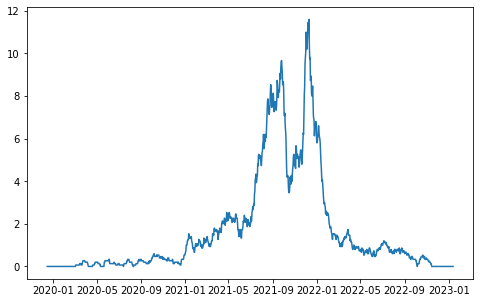

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(datalist["210"].diff().rolling(window=15).mean())